In [47]:
import byxtal.lattice as gbl;
import byxtal.find_csl_dsc as fcd;
import byxtal.integer_manipulations as iman;
import byxtal.bp_basis as bpb;
import numpy as np;
import math as mt;
import gbpy.util_funcs_create_byxtal as uf
import gbpy.generate_hkl_indices as ghi

from sympy.matrices import Matrix, eye, zeros;


In [48]:
l1 = gbl.Lattice('Al'); l_p_po = Matrix(l1.l_p_po); l_po_p = l_p_po.inv();

In [65]:
## (h k l) indices of the fcc lattice (described in p)
h = 3
k = 4
l = 7

hkl_p = Matrix([h,k,l])
# hkl_p1
l_bpb_p = bpb.bp_basis(hkl_p)
l_bpb_p = Matrix(l_bpb_p.astype(int));
l_bpb_po = l_p_po*l_bpb_p


lat_par = l1.lat_params['a']
r_cut = lat_par*4;
A_cut = rCut**2;
#####################################################################
### Area of the 2D unit-cell
area_bpl = (l_bpb_po[:,0].cross(l_bpb_po[:,1])).norm()
sig_num = np.ceil(A_cut/area_bpl);


#####################################################################
ind2 = np.array([], dtype='int64');
while (np.size(ind2) == 0):
    hnf_mats = ghi.sig_hnf_mats(sig_num);
    # print(hnf_mats)
    l_sig_p_mats, l_sig_po_mats = ghi.compute_hnf_props(hnf_mats, l_bpb_p, l_p_po);
    # print(l_sig_p_mats)
    ind2 = ghi.ind_min_cost(l_sig_po_mats, r_cut);
    sig_num = sig_num + 1;

l_bpbSig_p = l_sig_p_mats[ind2];
l_bpbSig_p = Matrix(l_bpbSig_p.astype(int));
l_bpbSig_po = l_p_po*l_bpbSig_p

In [77]:
l_po_go = uf.compute_orientation(l_bpbSig_po)
l2D_bpbSig_go = l_po_go*l_bpbSig_po
l2D_bpb_go = l_po_go*l_bpb_po
twoD_mat = l2D_bpb_go[:2,:]
twoDSig_mat = l2D_bpbSig_go[:2,:]
r_cut1 = uf.compute_rCut(l_bpbSig_po)
twoD_pts = uf.replicate_pts(twoD_mat, r_cut1)
twoD_pts = uf.remove_periodic_overlaps(twoD_pts, twoDSig_mat)

In [78]:
twoD_pts

array([[ 0.        ,  0.        ],
       [-2.35401468, 14.12408811],
       [ 0.94160587, 11.77007342],
       [ 4.23722643,  9.41605874],
       [ 7.53284699,  7.06204405],
       [10.82846755,  4.70802937],
       [14.12408811,  2.35401468]])

In [74]:
twoDSig_mat

Matrix([
[17.4197086657613, -5.64963524294962],
[               0,  16.4781027919364]])

In [75]:
r_cut1

20.2500000000000

In [28]:
twoD_pts = uf.replicate_pts(twoD_mat, rCut);
twoD_pts = uf.remove_periodic_overlaps(twoD_pts, twoDSig_mat)

In [29]:
twoD_pts

array([[0., 0.]])

In [79]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
def plot_2d_pts_box(twoD_pts, twoD_mat, orig):
    ################################################################################
    l1 = np.copy(twoD_mat);
    avec = l1[:,0]; bvec=l1[:,1];
    pts = np.zeros((4,2));
    pts[0,:] = orig;
    pts[1,:] = orig+avec; pts[2,:] = orig+avec+bvec; pts[3,:] = orig+bvec;
    tinds = [0,1,2,3,0];
    x1=pts[tinds,0];y1=pts[tinds,1];
    plt.plot(x1,y1);

    pts = np.copy(twoD_pts);
    x1=pts[:,0];y1=pts[:,1];
    plt.scatter(x1,y1);
    ################################################################################

In [120]:
twoDSig_mat_arr = np.array(twoDSig_mat,dtype='float')
a_vec = twoDSig_mat_arr[:,0]; b_vec = twoDSig_mat_arr[:,1]
a_vec, b_vec

(array([17.41970867,  0.        ]), array([-5.64963524, 16.47810279]))

In [121]:
twoDSig_mat_arr

array([[17.41970867, -5.64963524],
       [ 0.        , 16.47810279]])

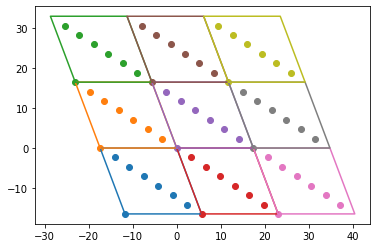

In [125]:
for tct1 in range(3):
    for tct2 in range(3):
        twoD_pts1 = 0*twoD_pts;
        orig = np.array([0,0])
        ct1 = tct1-1;
        ct2 = tct2-1;
        ct3 = 0; 

        twoD_pts1[:,ct3]    = twoD_pts[:,ct3]     + ct1*a_vec[ct3] + ct2*b_vec[ct3]

        ct3 = 1; 
        twoD_pts1[:,ct3]    = twoD_pts[:,ct3]     + ct1*a_vec[ct3] + ct2*b_vec[ct3]
        orig = ct1*a_vec + ct2*b_vec;
        plot_2d_pts_box(twoD_pts1, twoDSig_mat_arr, orig)
        # orig = ct1*a_vec + ct2*b_vec;
        # print(orig)